# Imports 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Data 

In [2]:
# Define the file path
file_path = '/kaggle/input/lung-cancer-prediction-dataset/lung_cancer.csv'

# Read the dataset into a DataFrame
df = pd.read_csv(file_path)

In [3]:
# Display the first five rows to verify the data
df.head()

age  gender  education_years  income_level  smoker  smoking_years  \
0   60       1               20             2       1             16   
1   53       0               12             4       0              0   
2   62       1               15             3       1              9   
3   73       1               12             3       0              0   
4   52       1               13             1       0              0   

   cigarettes_per_day  pack_years  passive_smoking  air_pollution_index  ...  \
0                  15          12                0                   71  ...   
1                   0           0                1                   66  ...   
2                  29          13                1                   69  ...   
3                   0           0                0                   47  ...   
4                   0           0                0                   94  ...   

   bmi  oxygen_saturation  fev1_x10  crp_level  xray_abnormal  \
0   20                 94        29          6              1   
1   25                 96        35          4              0   
2   23                 95        29          9              1   
3   18                 96        32          0              0   
4   16                 97        36          8              0   

   exercise_hours_per_week  diet_quality  alcohol_units_per_week  \
0                        5             4                      13   
1                        5             2                       0   
2                        1             4                       2   
3                        0             3                      10   
4                        6             2                       9   

   healthcare_access  lung_cancer_risk  
0                  3                 1  
1                  3                 0  
2                  1                 1  
3                  4                 0  
4                  2                 0  

[5 rows x 30 columns]

In [4]:
# Display information about the columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      5000 non-null   int64
 1   gender                   5000 non-null   int64
 2   education_years          5000 non-null   int64
 3   income_level             5000 non-null   int64
 4   smoker                   5000 non-null   int64
 5   smoking_years            5000 non-null   int64
 6   cigarettes_per_day       5000 non-null   int64
 7   pack_years               5000 non-null   int64
 8   passive_smoking          5000 non-null   int64
 9   air_pollution_index      5000 non-null   int64
 10  occupational_exposure    5000 non-null   int64
 11  radon_exposure           5000 non-null   int64
 12  family_history_cancer    5000 non-null   int64
 13  copd                     5000 non-null   int64
 14  asthma                   5000 non-null   int64
 15  prev

# Data Preprocessing

## Identify Variables

In [5]:
# Identify numerical variables
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical variables:")
print(numerical_vars)

print("\nCategorical variables:")
print(categorical_vars)

Numerical variables:
['age', 'gender', 'education_years', 'income_level', 'smoker', 'smoking_years', 'cigarettes_per_day', 'pack_years', 'passive_smoking', 'air_pollution_index', 'occupational_exposure', 'radon_exposure', 'family_history_cancer', 'copd', 'asthma', 'previous_tb', 'chronic_cough', 'chest_pain', 'shortness_of_breath', 'fatigue', 'bmi', 'oxygen_saturation', 'fev1_x10', 'crp_level', 'xray_abnormal', 'exercise_hours_per_week', 'diet_quality', 'alcohol_units_per_week', 'healthcare_access', 'lung_cancer_risk']

Categorical variables:
[]


## Mapping Dictionaries

In [6]:
# 1. Define clean mapping dictionaries without numbers
binary_map = {0: 'No', 1: 'Yes'}
gender_map = {0: 'Female', 1: 'Male'}

income_map = {
    1: 'Very Low', 
    2: 'Low', 
    3: 'Middle', 
    4: 'High', 
    5: 'Very High'
}

quality_map = {
    1: 'Poor', 
    2: 'Fair', 
    3: 'Average', 
    4: 'Good', 
    5: 'Excellent'
}

# 2. Define binary columns
binary_cols = [
    'smoker', 'passive_smoking', 'occupational_exposure', 'radon_exposure', 
    'family_history_cancer', 'copd', 'asthma', 'previous_tb', 
    'chronic_cough', 'chest_pain', 'shortness_of_breath', 'fatigue', 
    'xray_abnormal', 'lung_cancer_risk'
]

# 3. Apply the clean mappings
df['gender'] = df['gender'].map(gender_map)
df['income_level'] = df['income_level'].map(income_map)
df['diet_quality'] = df['diet_quality'].map(quality_map)
df['healthcare_access'] = df['healthcare_access'].map(quality_map)

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# 4. Verify the clean output
print(df[['gender', 'income_level', 'diet_quality', 'smoker', 'lung_cancer_risk']].head())

   gender income_level diet_quality smoker lung_cancer_risk
0    Male          Low         Good    Yes              Yes
1  Female         High         Fair     No               No
2    Male       Middle         Good    Yes              Yes
3    Male       Middle      Average     No               No
4    Male     Very Low         Fair     No               No


## Checking the Status

In [7]:
# Identify categorical variables (now strings/objects)
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Identify numerical variables (integers and floats)
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical Variables ({len(categorical_vars)}):")
print(categorical_vars)

print(f"\nNumerical Variables ({len(numerical_vars)}):")
print(numerical_vars)

Categorical Variables (18):
['gender', 'income_level', 'smoker', 'passive_smoking', 'occupational_exposure', 'radon_exposure', 'family_history_cancer', 'copd', 'asthma', 'previous_tb', 'chronic_cough', 'chest_pain', 'shortness_of_breath', 'fatigue', 'xray_abnormal', 'diet_quality', 'healthcare_access', 'lung_cancer_risk']

Numerical Variables (12):
['age', 'education_years', 'smoking_years', 'cigarettes_per_day', 'pack_years', 'air_pollution_index', 'bmi', 'oxygen_saturation', 'fev1_x10', 'crp_level', 'exercise_hours_per_week', 'alcohol_units_per_week']


# EDA 

## Numerical Variables (Box Plots)

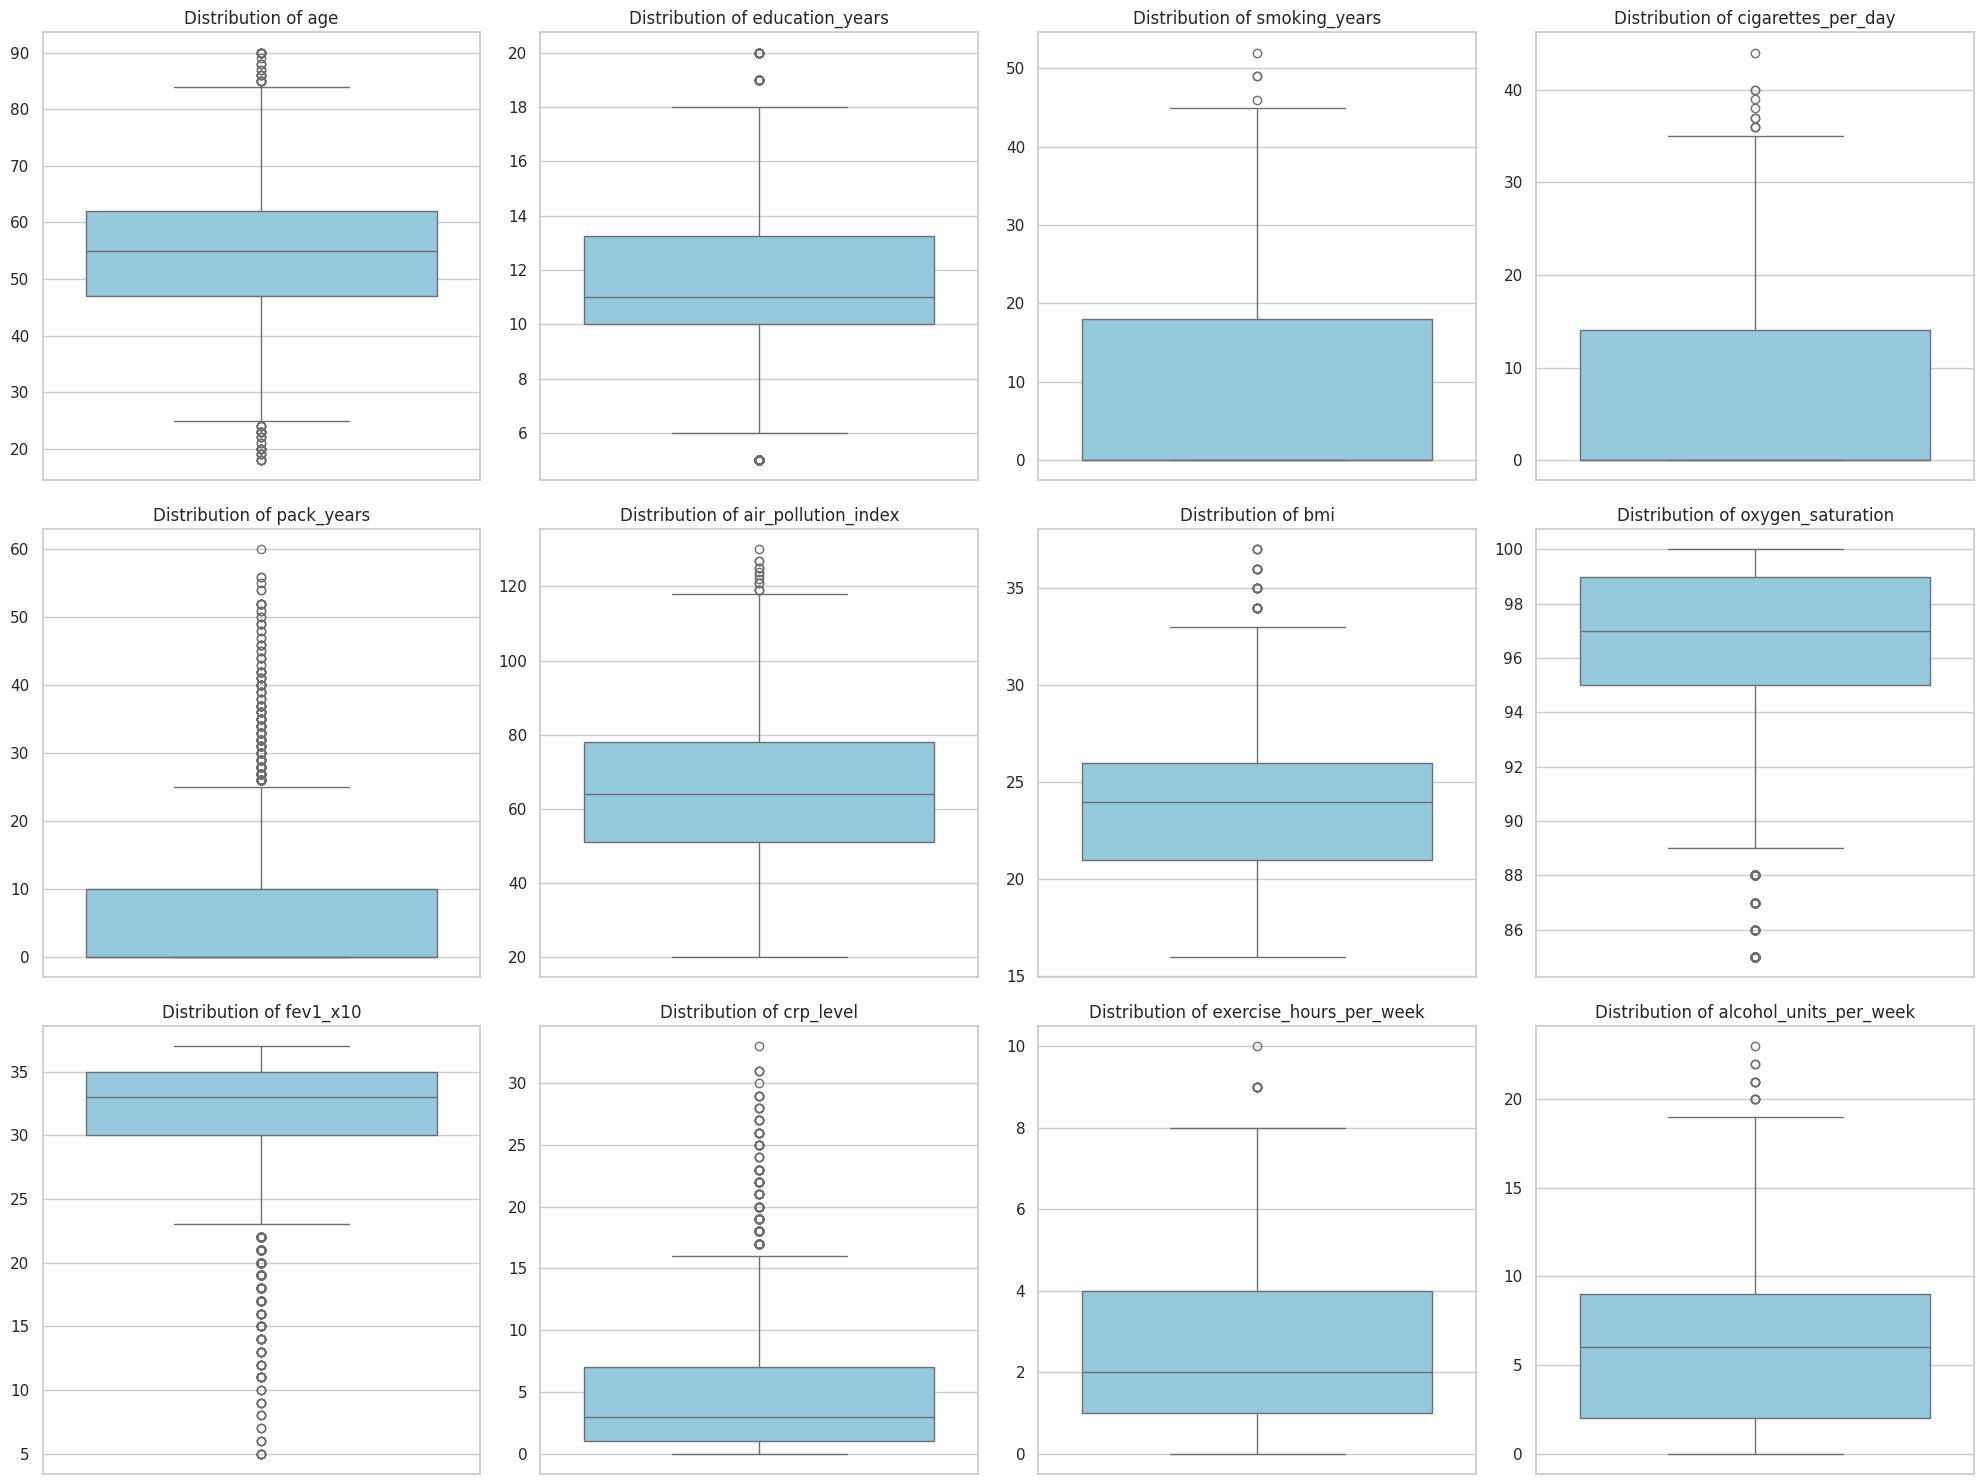

In [8]:
# Set the style
sns.set_theme(style="whitegrid")

# Create a figure for Numerical Variables (12 variables = 3 rows x 4 columns)
plt.figure(figsize=(20, 15))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, y=var, color='skyblue')
    plt.title(f'Distribution of {var}', fontsize=12)
    plt.ylabel('')

plt.tight_layout()
plt.savefig('numerical_boxplots.png')
plt.show()

## Categorical Variables (Bar Charts)

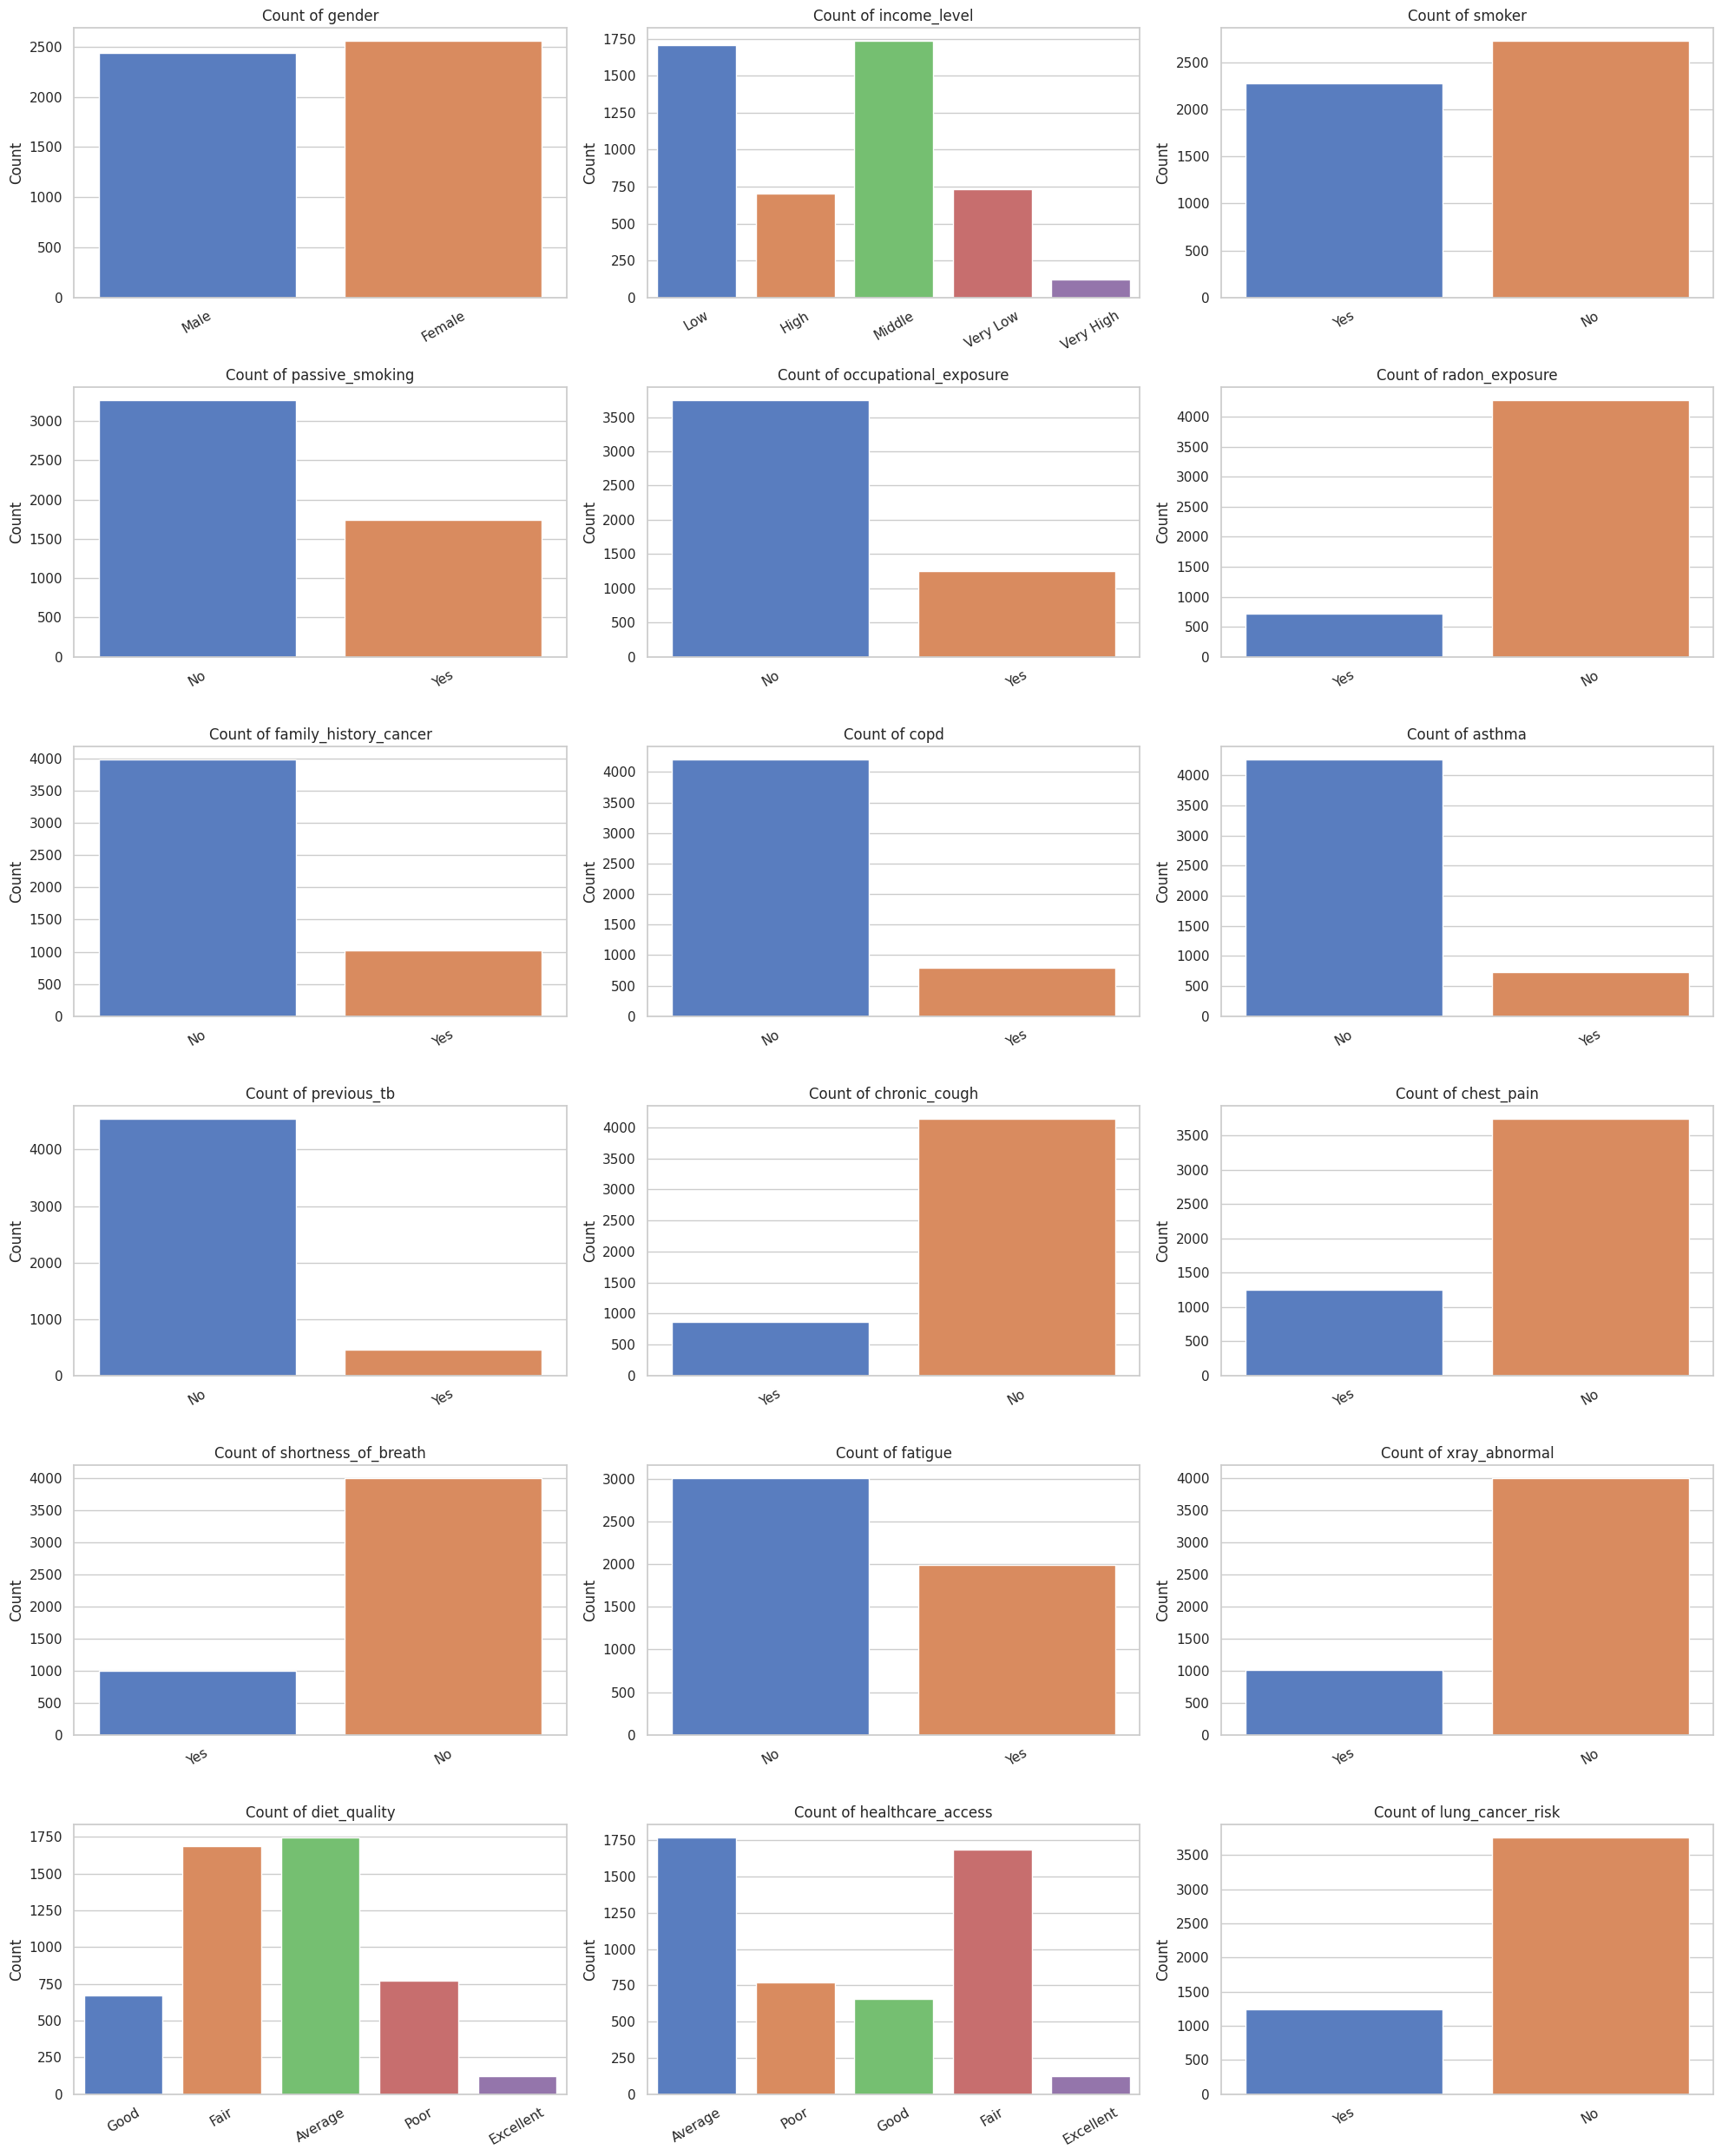

In [9]:
# Create a figure for Categorical Variables (18 variables = 6 rows x 3 columns)
plt.figure(figsize=(20, 25))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(6, 3, i)
    # countplot creates the bar chart for frequencies
    sns.countplot(data=df, x=var, palette='muted')
    plt.title(f'Count of {var}', fontsize=12)
    plt.xticks(rotation=30)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig('categorical_barcharts.png')
plt.show()

# Descriptive Statistics

## Descriptive Statistics for Numerical Variables

In [10]:
# Descriptive statistics for numerical variables
numerical_stats = df[numerical_vars].describe().T
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)

Descriptive Statistics for Numerical Variables:
                          count     mean        std   min   25%   50%    75%  \
age                      5000.0  54.5664  11.932731  18.0  47.0  55.0  62.00   
education_years          5000.0  11.5104   2.953987   5.0  10.0  11.0  13.25   
smoking_years            5000.0   8.8222  11.651598   0.0   0.0   0.0  18.00   
cigarettes_per_day       5000.0   6.6856   9.032888   0.0   0.0   0.0  14.00   
pack_years               5000.0   6.2490   9.964901   0.0   0.0   0.0  10.00   
air_pollution_index      5000.0  64.2788  19.479809  20.0  51.0  64.0  78.00   
bmi                      5000.0  23.6048   3.937222  16.0  21.0  24.0  26.00   
oxygen_saturation        5000.0  96.0892   3.412385  85.0  95.0  97.0  99.00   
fev1_x10                 5000.0  31.4758   5.213679   5.0  30.0  33.0  35.00   
crp_level                5000.0   4.5936   5.333566   0.0   1.0   3.0   7.00   
exercise_hours_per_week  5000.0   2.5804   1.834178   0.0   1.0   2.0   

## Frequencies and Percentages for Categorical Variables

In [11]:
# Frequencies and Percentages for categorical variables
print("Frequency and Percentage Tables for Categorical Variables:\n")

for var in categorical_vars:
    # Calculate counts
    counts = df[var].value_counts()
    # Calculate percentages
    percentages = df[var].value_counts(normalize=True) * 100
    
    # Combine into a single DataFrame for display
    freq_table = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    })
    
    print(f"--- {var} ---")
    print(freq_table)
    print("\n")

Frequency and Percentage Tables for Categorical Variables:

--- gender ---
        Count  Percentage (%)
gender                       
Female   2559           51.18
Male     2441           48.82


--- income_level ---
              Count  Percentage (%)
income_level                       
Middle         1736           34.72
Low            1706           34.12
Very Low        733           14.66
High            706           14.12
Very High       119            2.38


--- smoker ---
        Count  Percentage (%)
smoker                       
No       2726           54.52
Yes      2274           45.48


--- passive_smoking ---
                 Count  Percentage (%)
passive_smoking                       
No                3262           65.24
Yes               1738           34.76


--- occupational_exposure ---
                       Count  Percentage (%)
occupational_exposure                       
No                      3746           74.92
Yes                     1254           25.08

## Correlation Heatmap

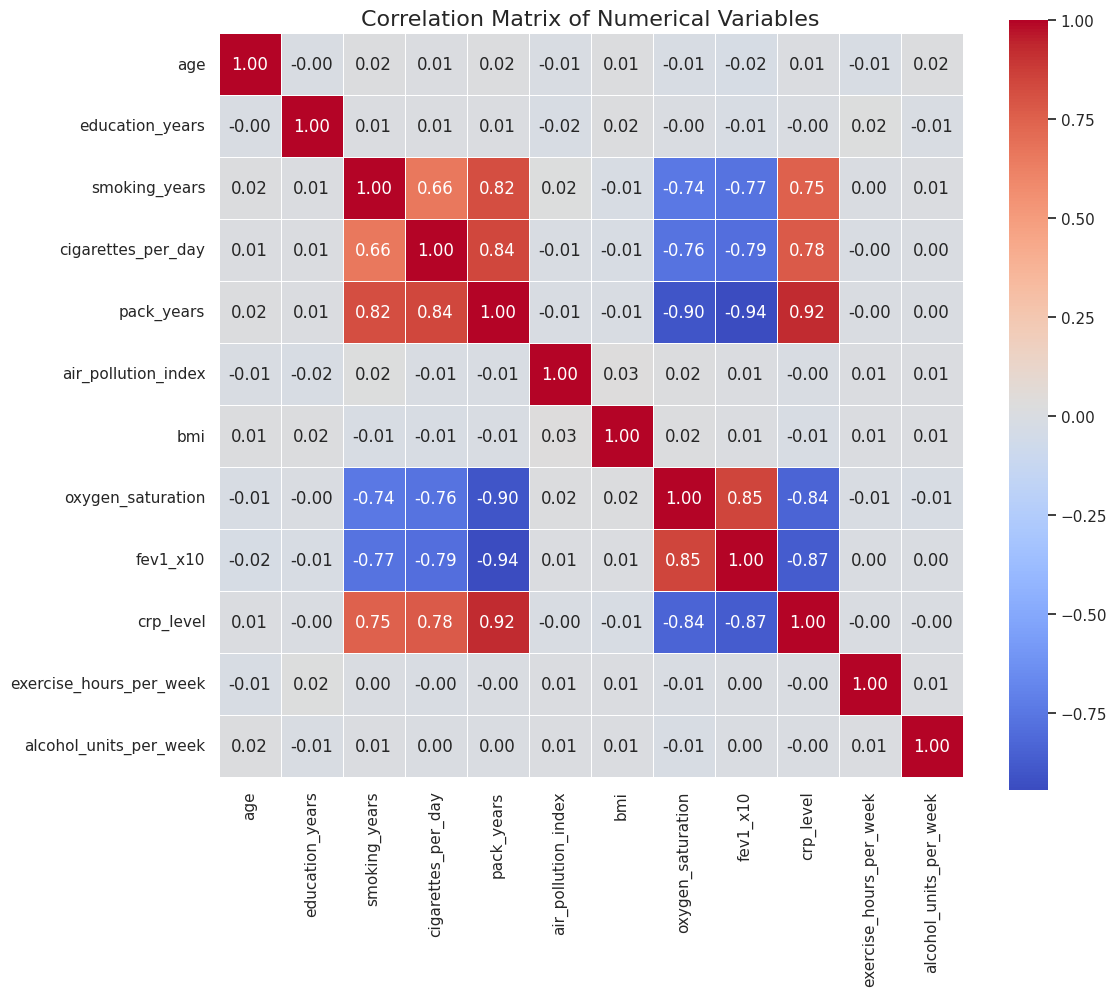

In [12]:
# Calculate the correlation matrix for numerical variables only
corr_matrix = df[numerical_vars].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix, 
            annot=True,              # Show the numeric correlation values
            fmt=".2f",               # Format to 2 decimal places
            cmap='coolwarm',         # Red for positive, blue for negative correlations
            linewidths=0.5, 
            square=True)

plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

## Correlation Scatterplot

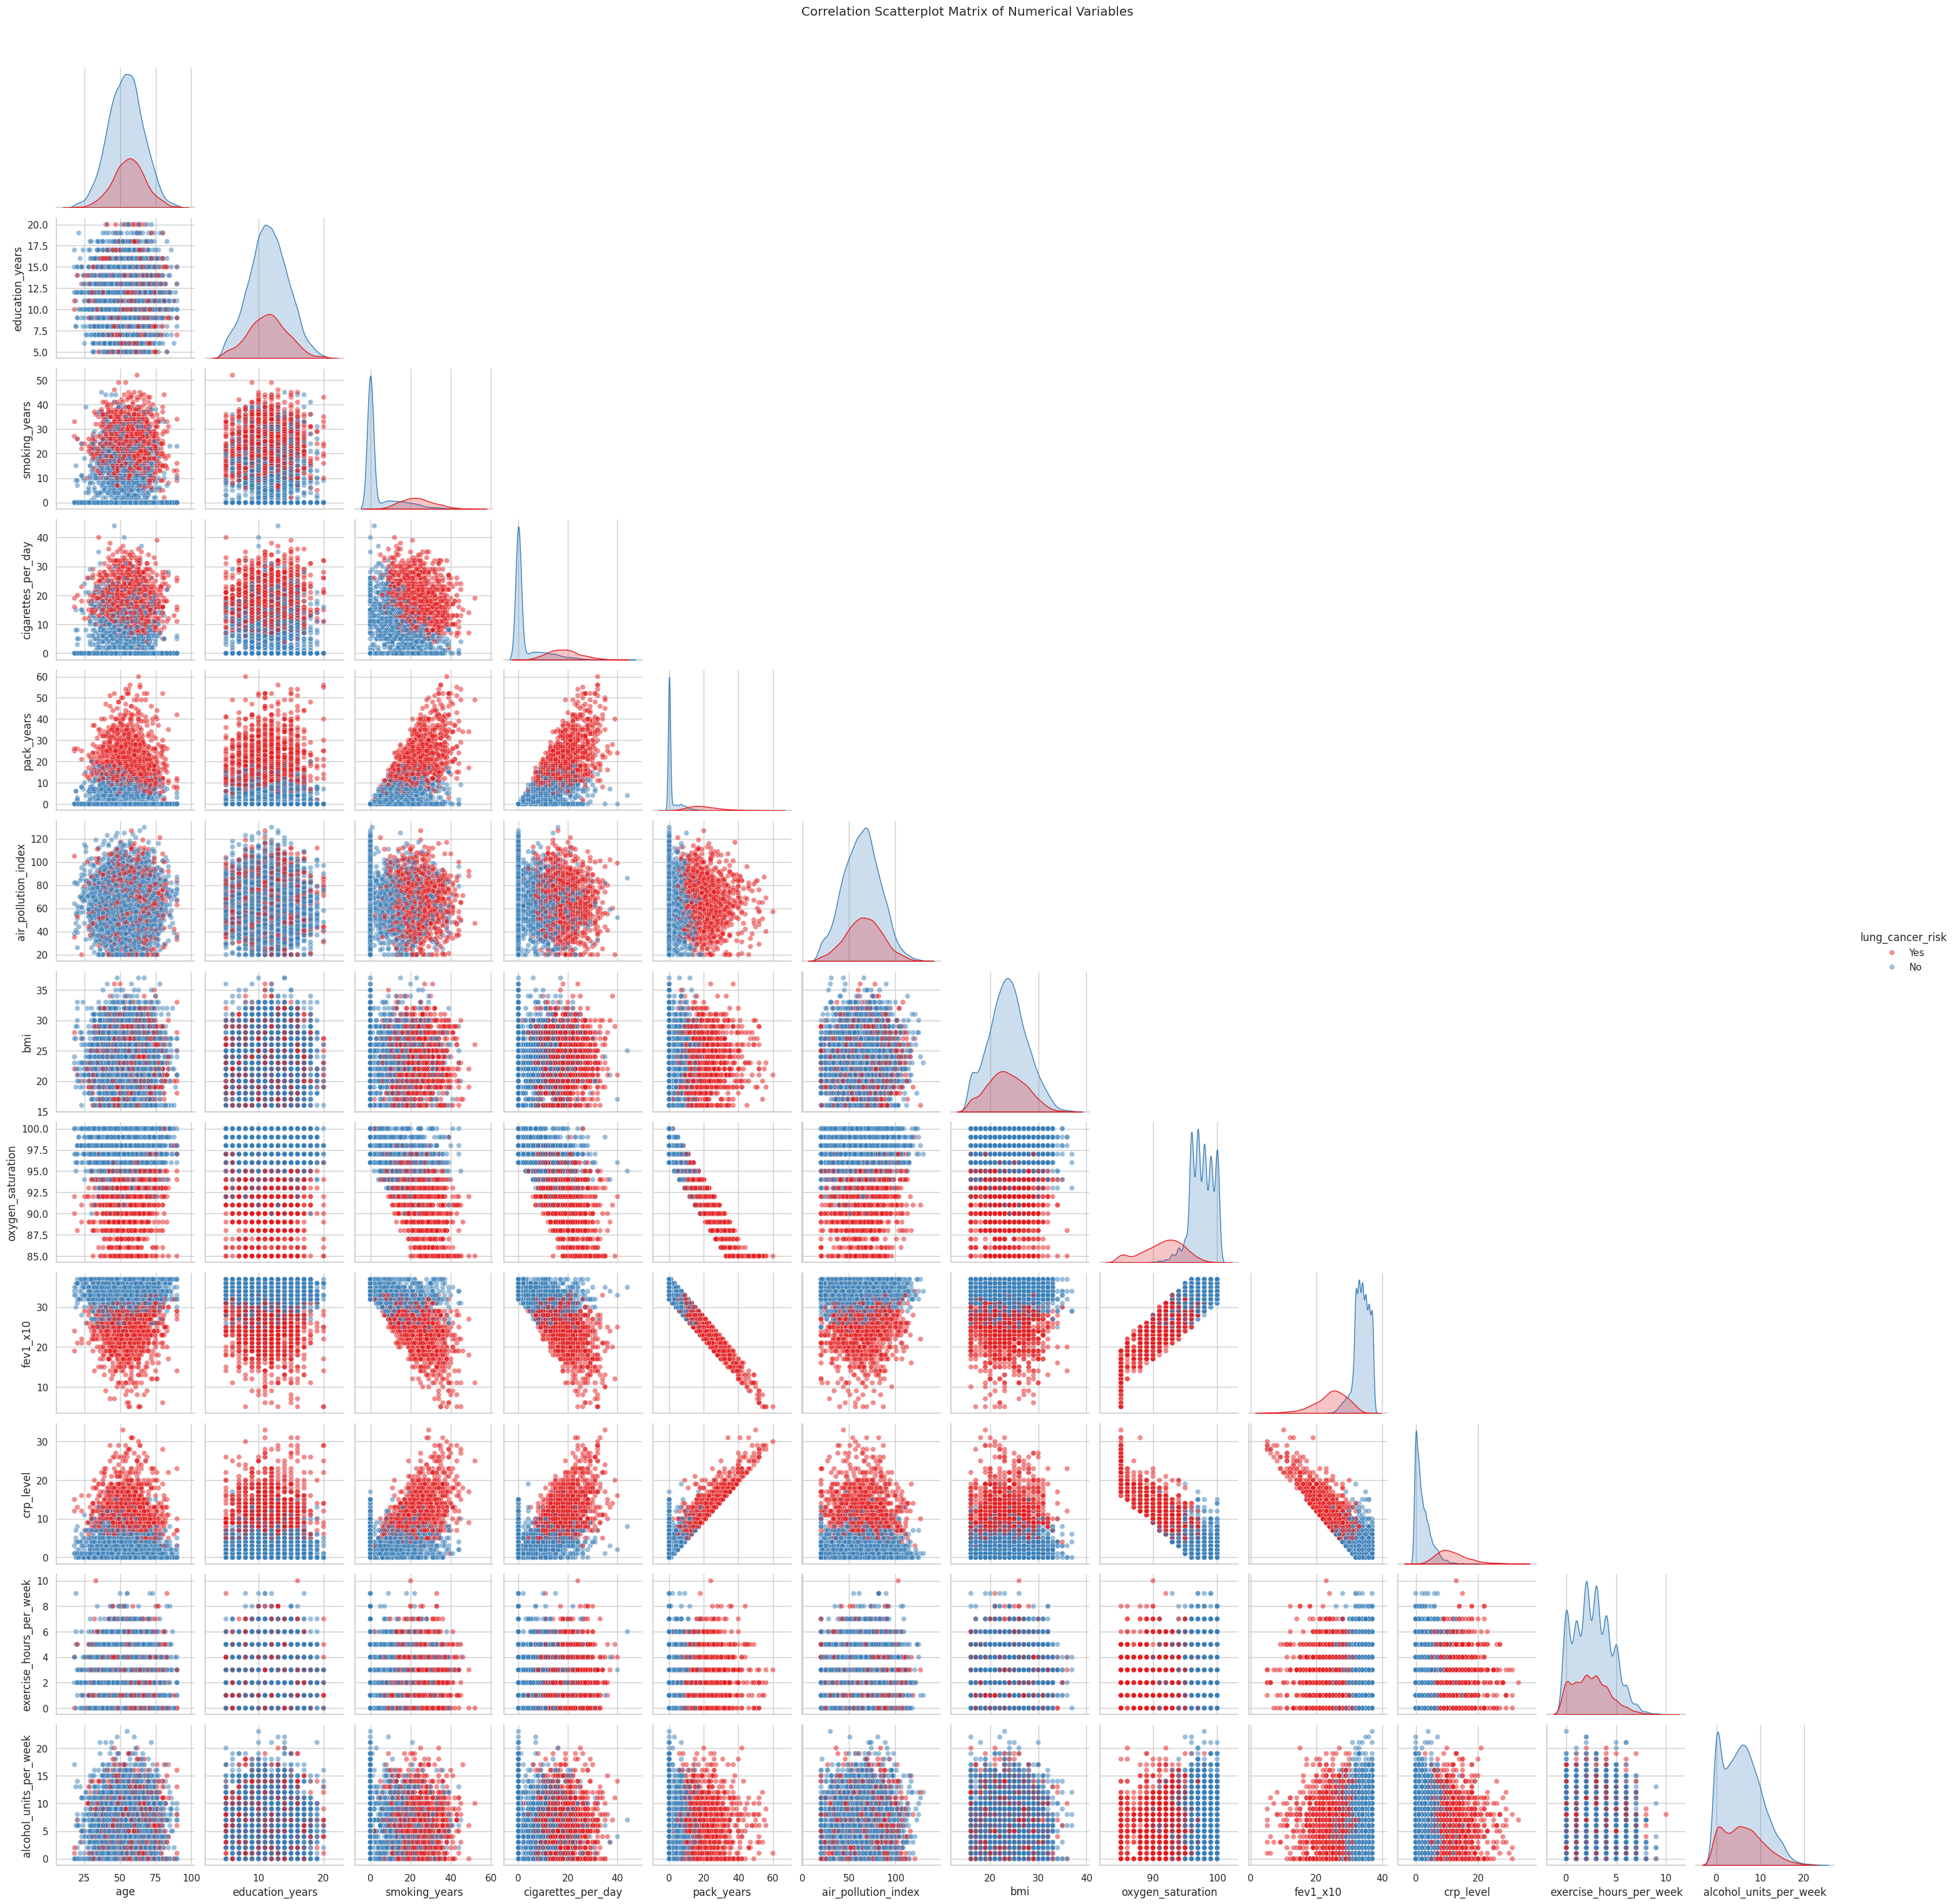

In [13]:
# Define the numerical variables and the target
numerical_vars = [
    'age', 'education_years', 'smoking_years', 'cigarettes_per_day', 
    'pack_years', 'air_pollution_index', 'bmi', 'oxygen_saturation', 
    'fev1_x10', 'crp_level', 'exercise_hours_per_week', 'alcohol_units_per_week'
]

# Create the scatterplot matrix
# 'corner=True' prevents duplicate plots by showing only the lower triangle
# 'hue' differentiates the data points by lung cancer risk
sns.pairplot(df[numerical_vars + ['lung_cancer_risk']], 
             hue='lung_cancer_risk', 
             corner=True, 
             palette='Set1',
             diag_kind='kde',
             plot_kws={'alpha': 0.5})

plt.suptitle('Correlation Scatterplot Matrix of Numerical Variables', y=1.02)
plt.show()

## lung_cancer_risk distribution over Numerical Vars

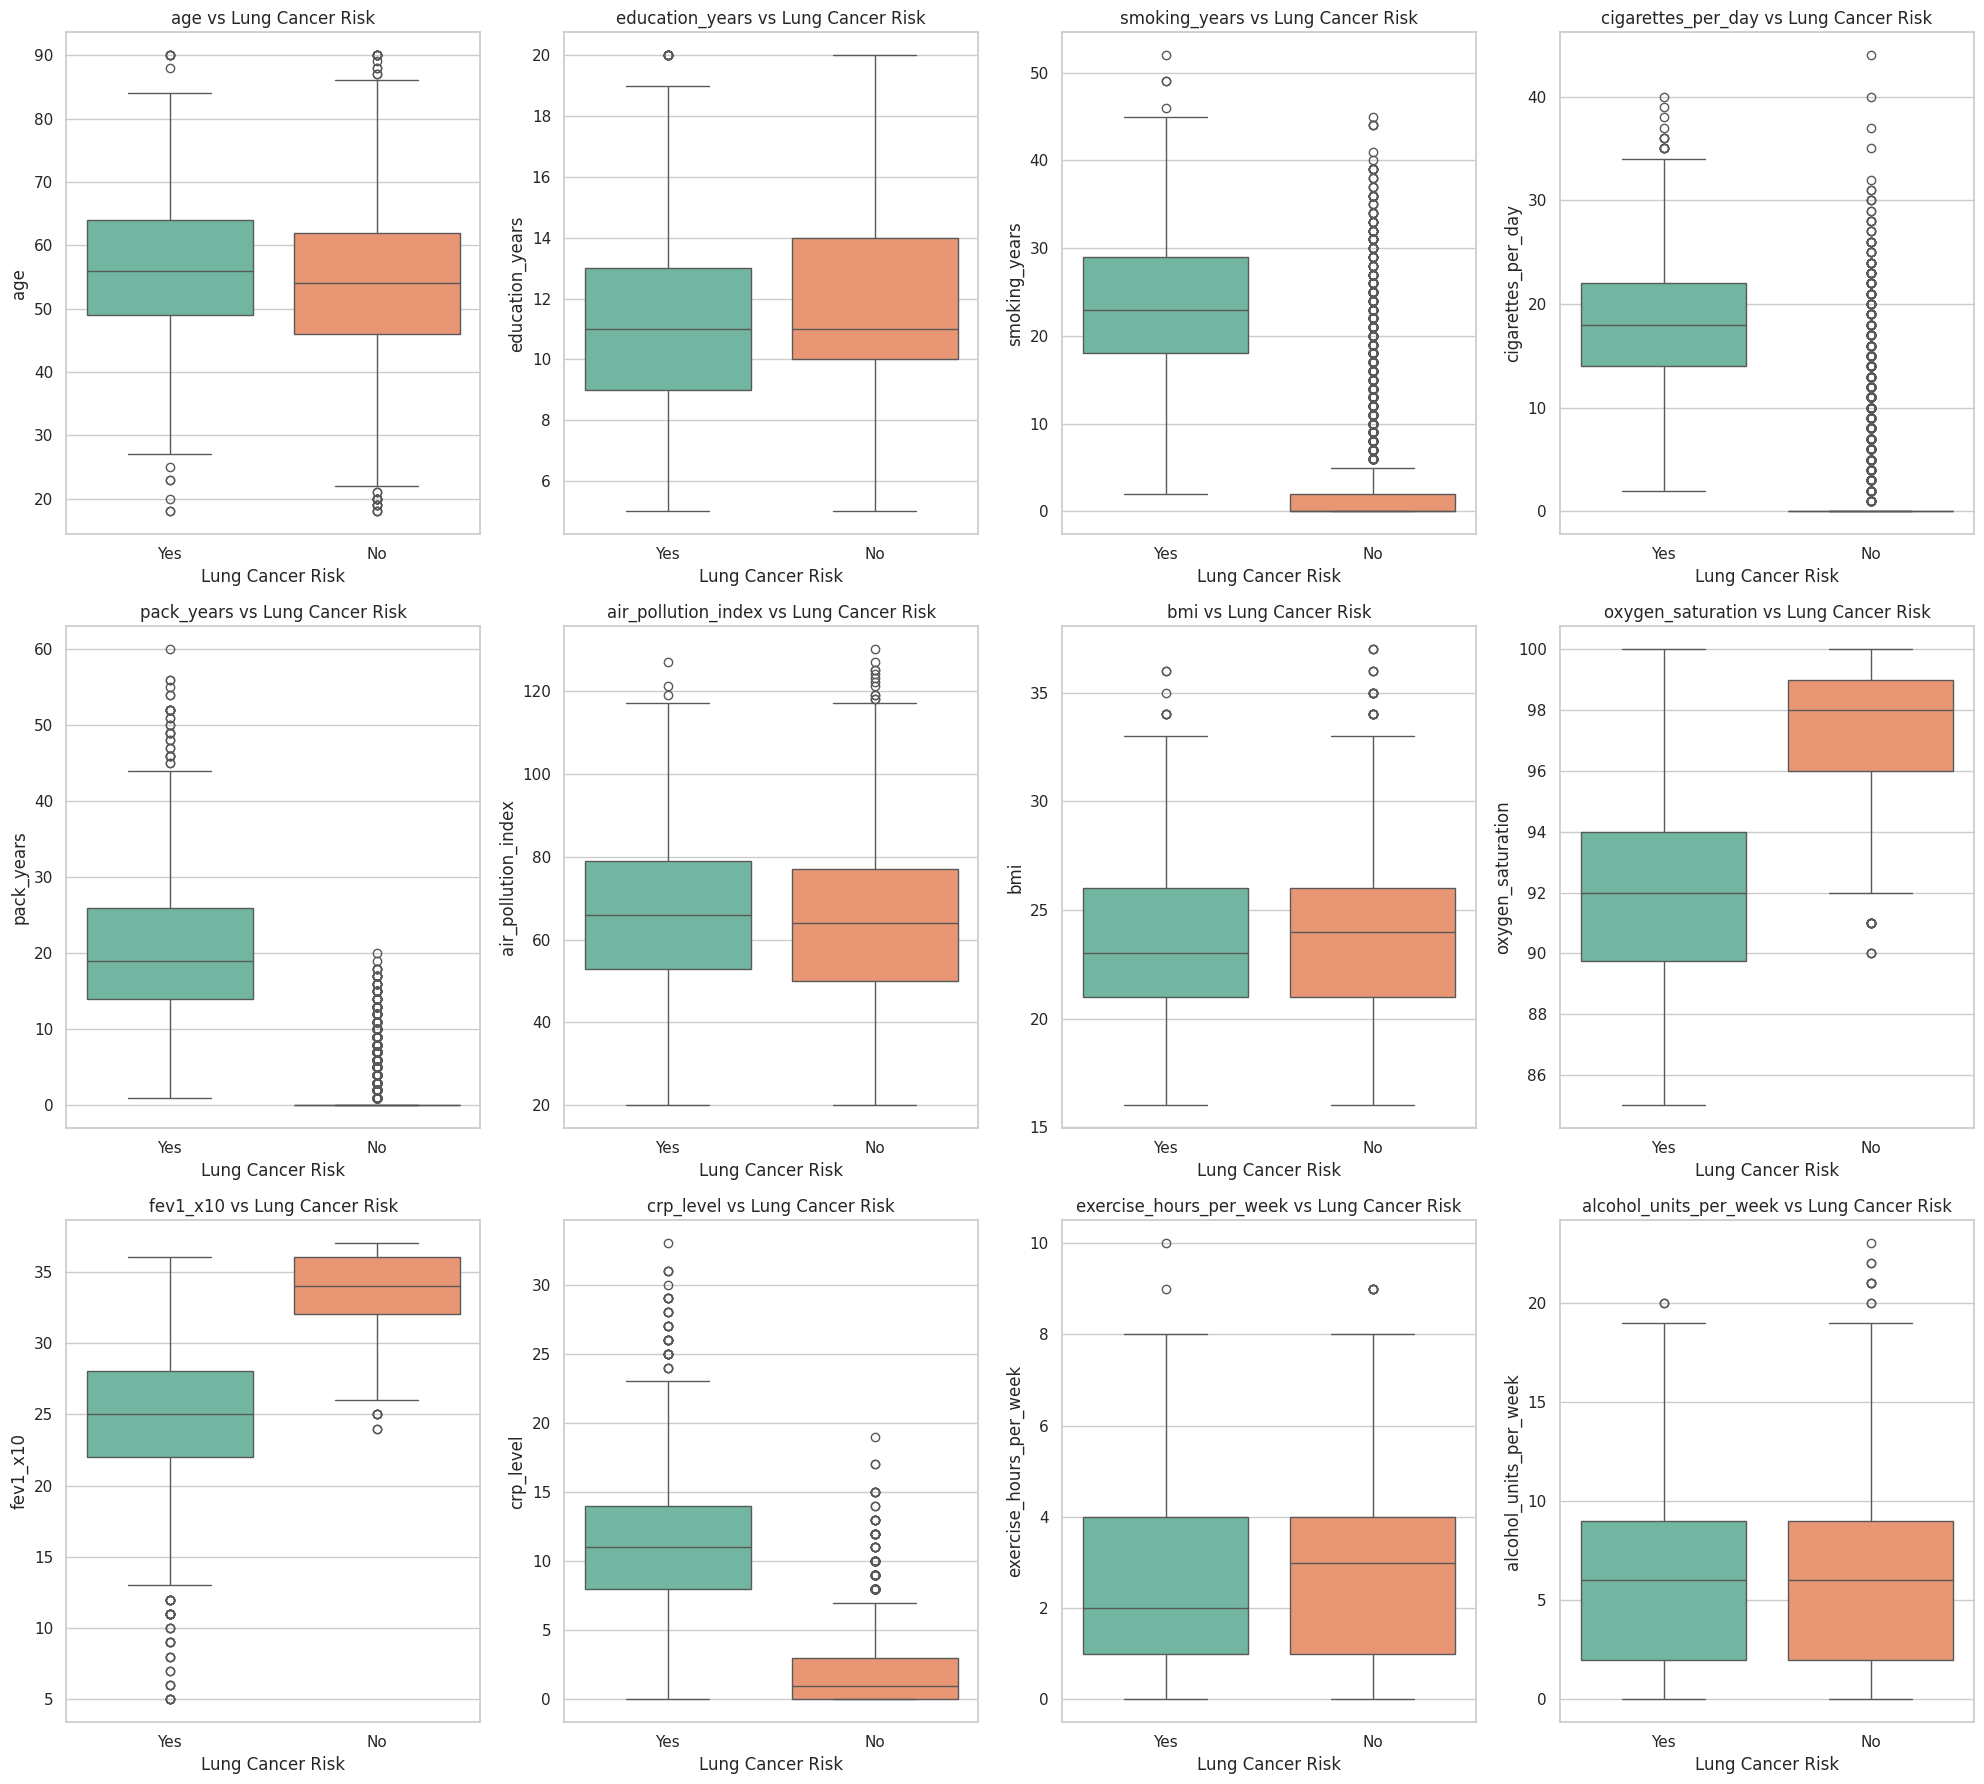

In [14]:
# Set the theme for the plots
sns.set_theme(style="whitegrid")

# Define numerical variables (based on previous steps)
numerical_vars = [
    'age', 'education_years', 'smoking_years', 'cigarettes_per_day', 
    'pack_years', 'air_pollution_index', 'bmi', 'oxygen_saturation', 
    'fev1_x10', 'crp_level', 'exercise_hours_per_week', 'alcohol_units_per_week'
]

# Create a figure with a 3x4 grid
plt.figure(figsize=(20, 18))

# Loop through each numerical variable to create a subplot
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='lung_cancer_risk', y=var, data=df, palette='Set2')
    plt.title(f'{var} vs Lung Cancer Risk', fontsize=12)
    plt.xlabel('Lung Cancer Risk')
    plt.ylabel(var)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('bivariate_boxplots.png')
plt.show()

## comparison_table

In [15]:
# Group by lung_cancer_risk and calculate key statistics for numerical variables
comparison_table = df.groupby('lung_cancer_risk')[numerical_vars].agg(['mean', 'median', 'std']).T

# Display the table
print("Descriptive Statistics Comparison (Grouped by Lung Cancer Risk):")
print(comparison_table)

Descriptive Statistics Comparison (Grouped by Lung Cancer Risk):
lung_cancer_risk                       No        Yes
age                     mean    53.992812  56.298232
                        median  54.000000  56.000000
                        std     12.065675  11.352126
education_years         mean    11.531683  11.446141
                        median  11.000000  11.000000
                        std      2.940567   2.994416
smoking_years           mean     3.984026  23.430064
                        median   0.000000  23.000000
                        std      8.054525   8.106239
cigarettes_per_day      mean     2.781949  18.471865
                        median   0.000000  18.000000
                        std      5.844738   6.314499
pack_years              mean     1.485623  20.631029
                        median   0.000000  19.000000
                        std      3.320125   9.512225
air_pollution_index     mean    63.717519  65.973473
                        median  64

## Cramér's V
While Chi-Square tells you if a relationship exists, Cramér's V tells you how strong that relationship is.

0.0 to 0.1: Weak or no association

0.1 to 0.3: Moderate association

0.3 and above: Strong association

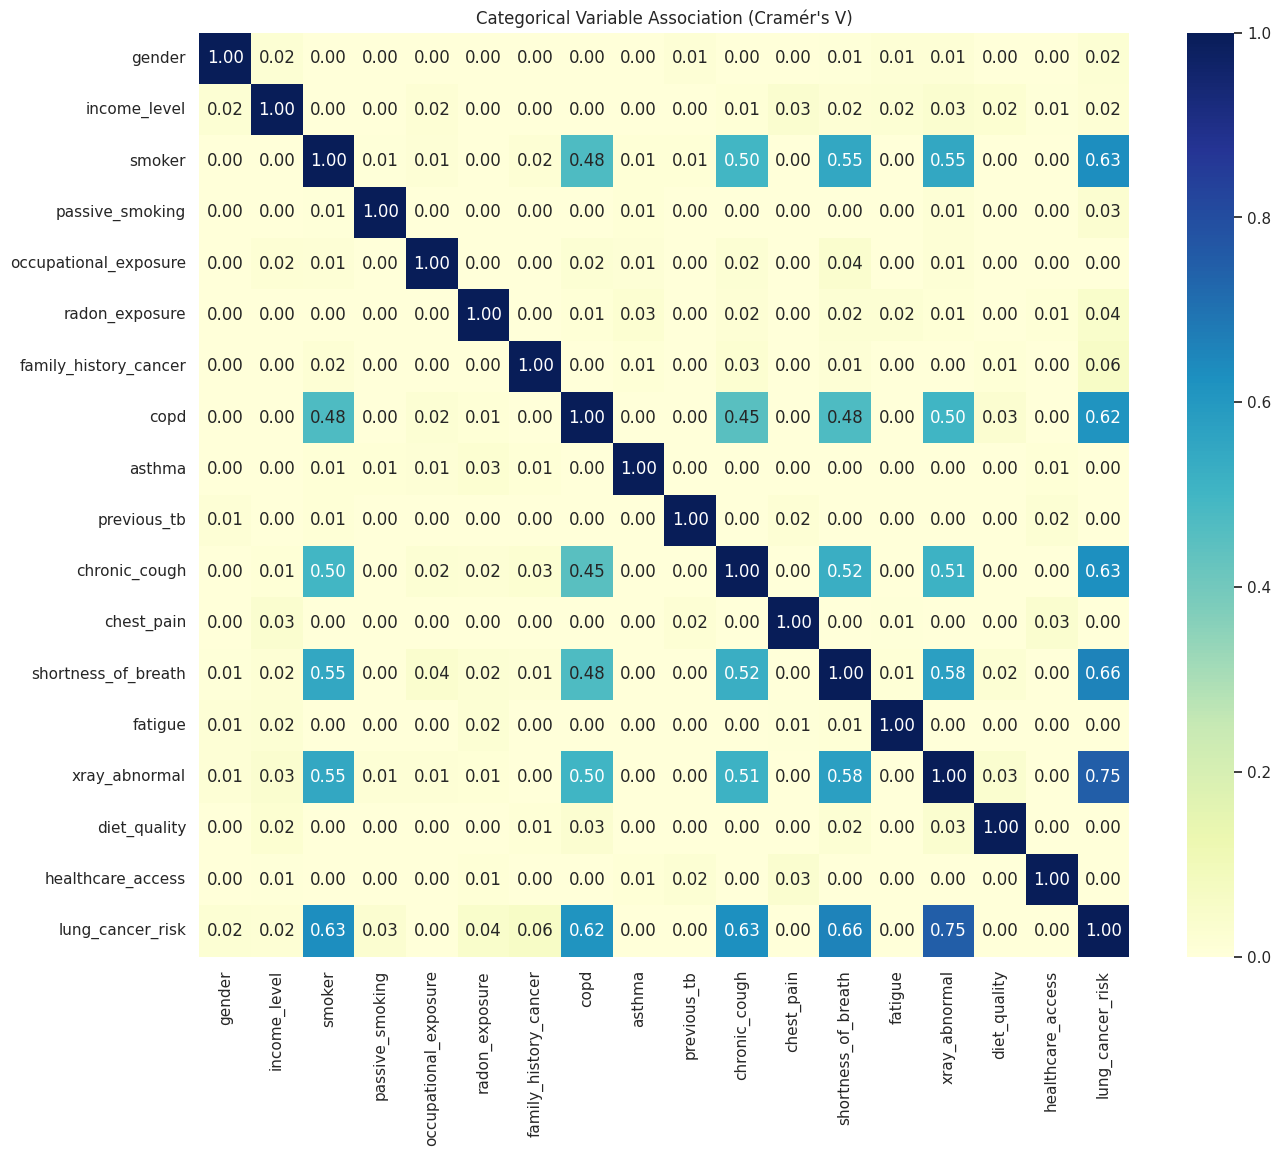

In [16]:
def cramers_v(x, y):
    """ Calculate Cramér's V statistic for categorical-categorical association. """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Initialize an empty matrix
rows = []
for var1 in categorical_vars:
    col = []
    for var2 in categorical_vars:
        col.append(cramers_v(df[var1], df[var2]))
    rows.append(col)

cramers_results = pd.DataFrame(rows, index=categorical_vars, columns=categorical_vars)

# Plot the Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cramers_results, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Categorical Variable Association (Cramér's V)")
plt.show()